In [1]:
import numpy as np
import matplotlib.pyplot as plt


Newthon


In [2]:
def divided_diff_triangle2(a, fa):
    assert len(a) == len(fa)
    n = len(a)
    table = np.zeros((n, n), dtype=np.float64)
    def f_(y1, y0, x1, x0): return (y1-y0)/(x1-x0)
    table[:, 0] = fa
    for i in range(1, n+1):  # col
        for j in range(i, n):  # row
            print(i, j, a[j], a[j-i])
            table[j][i] = f_(table[j][i-1], table[j-1][i-1], a[j], a[j-i])
            print(table)
    coef = [table[i][i] for i in range(n)]
    return coef


In [5]:
def divided_diff_triangle(a, fa):
    assert len(a) == len(fa)
    n = len(a)
    table = np.zeros((n, n), dtype=np.float64)
    def f_(y1, y0, x1, x0): return (y1-y0)/(x1-x0)
    table[:, 0] = fa
    for j in range(1, n):  # col
        for i in range(n-j):  # row
            table[i][j] = f_(table[i+1][j-1], table[i][j-1], a[i+j], a[i])
            print(table)
    coef = [table[0][i] for i in range(n)]
    return coef


In [6]:
a = (1, 2, 3, -4, 5)
fa = (2, 48, 272, 1182, 2262)
#a = (0,1,-1,2,-2)
#fa = (-5,-3,-15,39,-9)
#a = (0,2/3,1)
#fa = (1,0.5,0)


In [7]:
coef_tri = divided_diff_triangle(a, fa)
print(coef_tri)


[[2.000e+00 4.600e+01 0.000e+00 0.000e+00 0.000e+00]
 [4.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.720e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.182e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.262e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[2.000e+00 4.600e+01 0.000e+00 0.000e+00 0.000e+00]
 [4.800e+01 2.240e+02 0.000e+00 0.000e+00 0.000e+00]
 [2.720e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.182e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.262e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[ 2.000e+00  4.600e+01  0.000e+00  0.000e+00  0.000e+00]
 [ 4.800e+01  2.240e+02  0.000e+00  0.000e+00  0.000e+00]
 [ 2.720e+02 -1.300e+02  0.000e+00  0.000e+00  0.000e+00]
 [ 1.182e+03  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 2.262e+03  0.000e+00  0.000e+00  0.000e+00  0.000e+00]]
[[ 2.000e+00  4.600e+01  0.000e+00  0.000e+00  0.000e+00]
 [ 4.800e+01  2.240e+02  0.000e+00  0.000e+00  0.000e+00]
 [ 2.720e+02 -1.300e+02  0.000e+00  0.000e+00  0.000e+00]
 [ 

In [25]:
coef_tri = divided_diff_triangle2(a, fa)
print(coef_tri)


1 1 2 1
[[2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [4.800e+01 4.600e+01 0.000e+00 0.000e+00 0.000e+00]
 [2.720e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.182e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.262e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]]
1 2 3 2
[[2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [4.800e+01 4.600e+01 0.000e+00 0.000e+00 0.000e+00]
 [2.720e+02 2.240e+02 0.000e+00 0.000e+00 0.000e+00]
 [1.182e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.262e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]]
1 3 -4 3
[[ 2.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 4.800e+01  4.600e+01  0.000e+00  0.000e+00  0.000e+00]
 [ 2.720e+02  2.240e+02  0.000e+00  0.000e+00  0.000e+00]
 [ 1.182e+03 -1.300e+02  0.000e+00  0.000e+00  0.000e+00]
 [ 2.262e+03  0.000e+00  0.000e+00  0.000e+00  0.000e+00]]
1 4 5 -4
[[ 2.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 4.800e+01  4.600e+01  0.000e+00  0.000e+00  0.000e+00]
 [ 2.720e+02  2.240e+02  0.

In [12]:
def newton_p(x, a, coef):
    n = len(a)
    #print('degree ',n-1)
    ans = 0
    for i in range(n):
        mul = coef[i]
        print(mul, end="")
        for j in range(i):
            mul *= x - a[j]
            print("(x - {})".format(a[j]), end="")
        ans += mul
        print("+", end="")
    print('\n================\n')
    return ans


In [26]:
newton_ans = newton_p(-1, a, coef_tri)

print(newton_ans)
#print(newton_ans)


2.0+46.0(x - 1)+89.0(x - 1)(x - 2)+6.0(x - 1)(x - 2)(x - 3)+4.0(x - 1)(x - 2)(x - 3)(x - -4)+

12.0


In [14]:
0.75 * 2/3 -0.75

-0.25

In [15]:
def divided_diff(a, fa, pos, coef=[]):
    assert len(a) == len(fa)
    if len(a) == 1:
        print('fa[{}]={}'.format(a[0], fa[0]))
        if pos[0] == 0:
            coef.append(fa[0])
        return fa[0]
    *a_the_left, a_k = a
    a_0, *a_the_right = a
    *fa_the_left, fa_k = fa
    fa_0, *fa_the_right = fa
    *pos_the_left, pos_k = pos
    pos_0, *pos_the_right = pos
    print(a_0, a_the_left,  a_the_right, a_k)
    ans = (divided_diff(a_the_right, fa_the_right, pos_the_right, coef) -
           divided_diff(a_the_left, fa_the_left, pos_the_left, coef))/(a_k - a_0)
    print('divided diff {}= {}'.format(a, ans))
    if 0 in pos:
        coef.append(ans)
    return ans


In [16]:
coef = []
ans = divided_diff(a,fa,range(len(a)),coef)

1 [1, 2, 3, -4] [2, 3, -4, 5] 5
2 [2, 3, -4] [3, -4, 5] 5
3 [3, -4] [-4, 5] 5
-4 [-4] [5] 5
fa[5]=2262
fa[-4]=1182
divided diff [-4, 5]= 120.0
3 [3] [-4] -4
fa[-4]=1182
fa[3]=272
divided diff [3, -4]= -130.0
divided diff [3, -4, 5]= 125.0
2 [2, 3] [3, -4] -4
3 [3] [-4] -4
fa[-4]=1182
fa[3]=272
divided diff [3, -4]= -130.0
2 [2] [3] 3
fa[3]=272
fa[2]=48
divided diff [2, 3]= 224.0
divided diff [2, 3, -4]= 59.0
divided diff [2, 3, -4, 5]= 22.0
1 [1, 2, 3] [2, 3, -4] -4
2 [2, 3] [3, -4] -4
3 [3] [-4] -4
fa[-4]=1182
fa[3]=272
divided diff [3, -4]= -130.0
2 [2] [3] 3
fa[3]=272
fa[2]=48
divided diff [2, 3]= 224.0
divided diff [2, 3, -4]= 59.0
1 [1, 2] [2, 3] 3
2 [2] [3] 3
fa[3]=272
fa[2]=48
divided diff [2, 3]= 224.0
1 [1] [2] 2
fa[2]=48
fa[1]=2
divided diff [1, 2]= 46.0
divided diff [1, 2, 3]= 89.0
divided diff [1, 2, 3, -4]= 6.0
divided diff (1, 2, 3, -4, 5)= 4.0


In [17]:
print(ans,coef)

4.0 [2, 46.0, 89.0, 6.0, 4.0]


In [18]:
newton_p(3,a,coef)

2+46.0(x - 1)+89.0(x - 1)(x - 2)+6.0(x - 1)(x - 2)(x - 3)+4.0(x - 1)(x - 2)(x - 3)(x - -4)+



272.0

2+46.0(x - 1)+89.0(x - 1)(x - 2)+6.0(x - 1)(x - 2)(x - 3)+4.0(x - 1)(x - 2)(x - 3)(x - -4)+



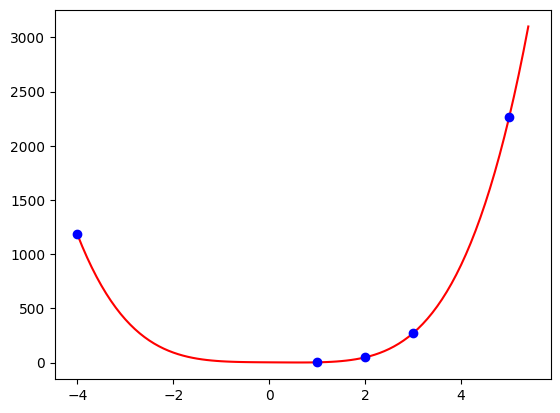

In [19]:
x = np.arange(-4, 5.5, 0.10)
y = newton_p(x, a, coef)

plt.plot(x, y, 'red')
plt.plot(a, fa, 'bo')


In [20]:
for i in range(len(x)):
    print(x[i],y[i])

-4.0 1182.0
-3.9 1072.9243999999999
-3.8 971.6383999999996
-3.6999999999999997 877.7603999999999
-3.5999999999999996 790.9184
-3.4999999999999996 710.7499999999998
-3.3999999999999995 636.9023999999993
-3.2999999999999994 569.0323999999996
-3.1999999999999993 506.8063999999997
-3.099999999999999 449.90039999999976
-2.999999999999999 397.9999999999996
-2.899999999999999 350.8003999999997
-2.799999999999999 308.00639999999964
-2.699999999999999 269.33239999999955
-2.5999999999999988 234.5023999999995
-2.4999999999999987 203.24999999999955
-2.3999999999999986 175.31839999999966
-2.2999999999999985 150.4603999999997
-2.1999999999999984 128.43839999999983
-2.0999999999999983 109.02439999999984
-1.9999999999999982 91.99999999999972
-1.8999999999999981 77.15639999999968
-1.799999999999998 64.29439999999977
-1.699999999999998 53.22439999999972
-1.5999999999999979 43.766399999999805
-1.4999999999999978 35.74999999999977
-1.3999999999999977 29.01439999999991
-1.2999999999999976 23.40839999999997

Laggange


In [16]:
def lagrange_p(x, a, fa):
    n = len(a)
    assert len(a) == len(fa)
    fili = []
    for i in range(n):
        numerator = 1
        denominator = 1
        for j in range(n):
            if (i != j):
                numerator *= x - a[j]
                denominator *= a[i] - a[j]
        fili.append(fa[i]*numerator/denominator)
    return sum(fili)


In [20]:
12.0+1e-6 >=lagrange_p(-1,a,fa)>= 12.0-1e-6

True

In [18]:
a=(1,2,3,-4,5)
fa = (2,48,272,1182,2262)

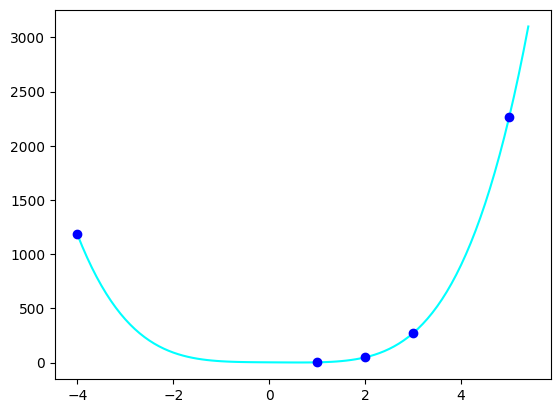

In [19]:
x = np.arange(-4, 5.5, 0.10)
y_lagrange = lagrange_p(x, a, fa)

#plt.plot(x, yans, 'red')
plt.plot(x, y_lagrange, 'cyan')
plt.plot(a, fa, 'bo')
mylagrange = ()
